In [379]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)
pic_ind = 0

# Лабораторная работа $№8$ 

# «Методы последовательной безусловной минимизации»
<font size="4">**Вариант $№6$**</font>


Решить задачу нелинейного программирования для
1. Квадратичной функции, заданной для лабораторных работ № 2-7
2. Функции Розенброка с двумя параметрами $\alpha$, заданной для лабораторных работ № 2-7
3. Для каждой задачи решение искать в заданном допустимом множестве:

а. 
$$
\begin{cases}
x \ge -10;\\
y \ge 0; \\
x + y \le 1.
\end{cases}
$$

b.
$$
    \dfrac{(x+3)^2}{16} + \dfrac{(y+4)^2}{9} \le 1.
$$

4. Реализовать два метода: метод внутренних штрафных функций (барьерных функций) и метод внешних штрафных функций.
5. Внутри каждого метода выбор “безусловного минимизатора” должен быть обоснован исходя из данных предыдущих лабораторных работ.
6. Решить задачу с двумя параметрами точности поиска (как в лабораторных работах №2-7).
7. Решить задачу с двумя различными начальными точками.
8. Сделать выводы.

# Постановка задачи
1) $f_1(x, y) = 5x^2 + 4xy + 2y^2 + 4\sqrt5 (x+y) + 51$;

   $f_1(x, y) \to min,\phantom{x} (x, y) \in \mathbb{\Omega}$.
 
$\phantom{x}$ 
2) $f_2(x, y) = \alpha (x^2 - y)^2 + (x-1)^2$, $\phantom{x}\alpha \in \{1, 20\}$;

   $\phantom{xxi}$ $f_2(x, y) \to min,\phantom{x} (x, y) \in \mathbb{\Omega}$.


In [380]:
import numpy as np

def f1_pl(x, y):
    return 5*x*x + 4*x*y + 2*y*y + 4*np.sqrt(5)*(x+y) + 51
def f21_pl(x, y):
    return (x*x - y)**2 + (x-1)**2
def f22_pl(x, y):
    return 20*(x*x - y)**2 + (x-1)**2

In [381]:
eps1 = 0.01
eps2 = 10**(-5)

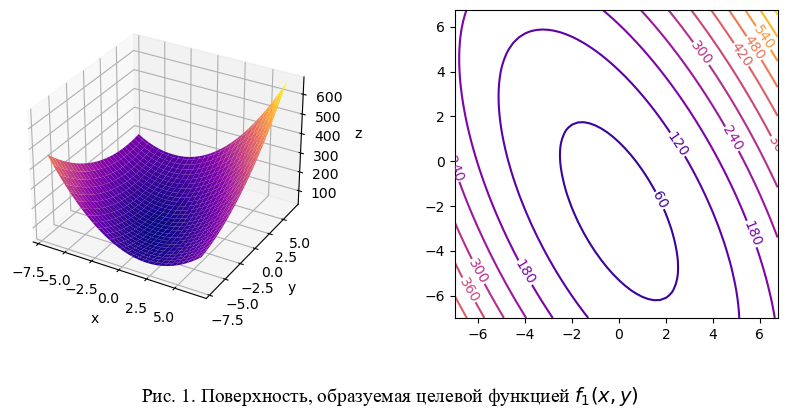

In [382]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
F1 = np.vectorize(f1_pl)
Z = F1(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 1. Поверхность, образуемая целевой функцией $f_1(x,y)$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
plt.show()

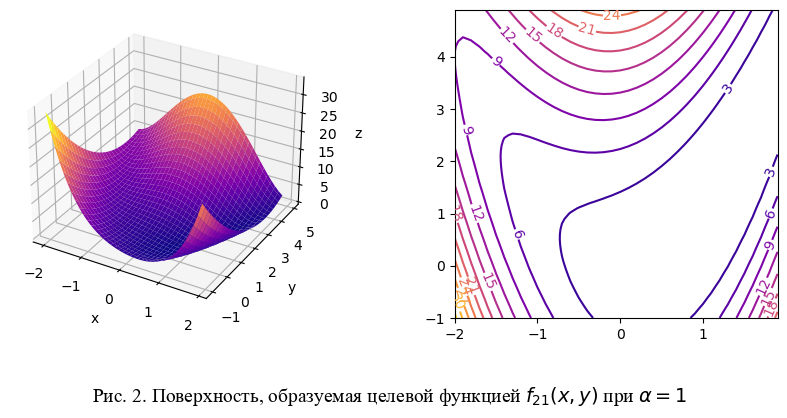

In [383]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F2 = np.vectorize(f21_pl)
Z = F2(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 2. Поверхность, образуемая целевой функцией $f_{21}(x,y)$ при $α = 1$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
 
plt.show()

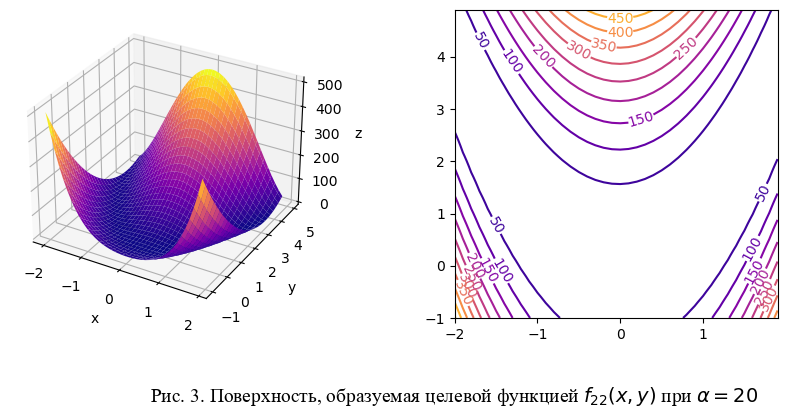

In [384]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F22 = np.vectorize(f22_pl)
Z = F22(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=10, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 3. Поверхность, образуемая целевой функцией $f_{22}(x,y)$ при $α = 20$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = 0)
 
plt.show()

Выделим в допустимых множествах a и b функции $g_i$:

а. 
$$
\begin{cases}
-x - 10 \le 0;\\
-y \le 0; \\
x + y - 1 \le 0.
\end{cases}
$$

b.
$$
    \dfrac{(x+3)^2}{16} + \dfrac{(y+4)^2}{9} - 1\le 0.
$$

In [385]:
import numpy as np
def g1(x):
    return -x[0]-10
def g2(x):
    return -x[1]
def g3(x):
    return x[0]+x[1]-1
def g4(x):
    return (x[0]+3)**2 / 16 + (x[1]+4)**2/9 - 1
def f1(x):
    return 5*x[0]*x[0] + 4*x[0]*x[1] + 2*x[1]*x[1] + 4*np.sqrt(5)*(x[0]+x[1]) + 51
def f21(x):
    return (x[0]*x[0] - x[1])**2 + (x[0]-1)**2
def f22(x):
    return 20*(x[0]*x[0] - x[1])**2 + (x[0]-1)**2

# Метод внутренних штрафных функций

In [386]:
class System(list):
    def __init__(self, A, f):
        tmpl = [e.copy() for e in A[:]]
        for i in range(len(f)):
            tmpl[i].append(f[i])
        list.__init__(self, tmpl)

    def swap(self, i, j):
        if i != j:
            temp = self[i]
            self[i] = self[j]
            self[j] = temp

    def coef_reduce(self, i, coef):
        for j in range(len(self[i])):
            self[i][j] /= coef

    def str_reduce(self, current, upper):
        coef = self[current][upper]
        for i in range(len(self[upper])):
            self[current][i] -= coef * self[upper][i]
def max_i(Matrix, count, eps):
    max_i = count
    max_ai = abs(Matrix[count][count])
    for i in range(count, len(Matrix)):
        if abs(Matrix[i][count]) > max_ai:
            max_i = i
            max_ai = abs(Matrix[i][count])
    if max_ai <= eps: return None
    return max_i

def GaussElimination(A, f, eps):
    Sys = System(A, f)
    n = len(Sys)
    #прямой ход:
    for i in range(n):
        max_pos = max_i(Sys, i, eps)
        if max_pos != None:
            Sys.swap(i, max_pos)
            Sys.coef_reduce(i, Sys[i][i])
            if i == n: break
            for j in range(i+1, n):
                Sys.str_reduce(j, i)
    solution = [Sys[-1][-1]]
    for i in range(n-2, -1, -1):
        x = Sys[i][-1]
        for j in range(i+1, n):
            x -= Sys[i][j]*solution[n-j-1]
        solution.append(x)
    solution.reverse()
    return solution
######################################################
def deriv_x(func, x, eps):
    h = eps*1e-2
    return (func(x + np.array([h,0]))-func(x-np.array([h,0])))/(2*h)
def deriv_y(func, x, eps):
    h = eps*1e-2
    return (func(x + np.array([0,h]))-func(x -np.array([0,h])))/(2*h)

def gradf(func, x, eps):
    return np.array([deriv_x(func, x, eps), deriv_y(func, x, eps)])

def hessef(func, x, eps):
    h = eps*1e-2
    fxx = (deriv_x(func, x+np.array([h,0]), eps) - deriv_x(func, x-np.array([h,0]), eps)) / (2*h)
    fxy = (deriv_x(func, x+np.array([0,h]), eps) - deriv_x(func, x-np.array([0,h]), eps)) / (2*h)
    fyx = (deriv_y(func, x+np.array([h,0]), eps) - deriv_y(func, x-np.array([h,0]), eps)) / (2*h)
    fyy = (deriv_y(func, x+np.array([0,h]), eps) - deriv_y(func, x-np.array([0,h]), eps)) / (2*h)
    return fxx, fxy, fyx, fyy

def NewtonMinSearch(func, x0, eps):
    def positive_matrix(a, b, c, d):
        if a > 0 and a*d - b*c > 0:
            return True
        return False
    def E_inc(a, d, coef):
        return a + coef, d + coef
    x = x0
    iterations = 0
    while True:
        w = -gradf(func, x, eps)
        length = np.linalg.norm(w)
        fxx, fxy, fyx, fyy = hessef(func, x, eps)
        positive = positive_matrix(fxx, fxy, fyx, fyy)
        if length <= eps: 
            if positive:
                break
            else: 
                print("Необходимо доп. исследование в окрестности точки")
                break
        h_fxx, h_fxy, h_fyx, h_fyy = fxx, fxy, fyx, fyy
        if not positive: 
            eta = 1
            while not positive_matrix(h_fxx, h_fxy, h_fyx, h_fyy):
                h_fxx, h_fyy = E_inc(h_fxx, h_fyy, eta)
        #решаем СЛАУ, находим p и точку x = x+p, идём в начало        
        p = GaussElimination([[h_fxx, h_fxy], 
                                    [h_fyx, h_fyy]],
                                  [w[0], w[1]], eps*1e-1)
        x = x + p
        iterations += 1
        if iterations >= 100: break
    return x
################################################33
def InfoNewtonMinSearch(func, x0, eps):
    def positive_matrix(a, b, c, d):
        if a > 0 and a*d - b*c > 0:
            return True
        return False
    def E_inc(a, d, coef):
        return a + coef, d + coef
    x = x0
    iterations = 0
    grcalls = 0
    hscalls = 0
    while True:
        w = -gradf(func, x, eps)
        grcalls += 1
        length = np.linalg.norm(w)
        fxx, fxy, fyx, fyy = hessef(func, x, eps)
        hscalls += 1
        positive = positive_matrix(fxx, fxy, fyx, fyy)
        if length <= eps: 
            if positive:
                break
            else: 
                print("Необходимо доп. исследование в окрестности точки")
                break
        h_fxx, h_fxy, h_fyx, h_fyy = fxx, fxy, fyx, fyy
        if not positive: 
            eta = 1
            while not positive_matrix(h_fxx, h_fxy, h_fyx, h_fyy):
                h_fxx, h_fyy = E_inc(h_fxx, h_fyy, eta)
        #решаем СЛАУ, находим p и точку x = x+p, идём в начало        
        p = GaussElimination([[h_fxx, h_fxy], 
                                    [h_fyx, h_fyy]],
                                  [w[0], w[1]], eps*1e-1)
        x = x + p
        iterations += 1
        if iterations >= 100: break
    return x, grcalls, hscalls

In [387]:
def IPFMinSearch(func, x0, eps, *gfuncs):
    def delta_k(x, _r,*gfuncs):
        tmp = 0
        for gf in gfuncs:
            tmp += _r/gf(x)
        return tmp 
    f_k = lambda x: func(x) - delta_k(x, r, *gfuncs)
    r = 32
    f_k1 = func(x0)
    f_k2 = f_k1
    x_star = x0
    while True:
        x_star = NewtonMinSearch(f_k, x_star, eps)
        f_k2 = func(x_star)
        if abs(f_k2 - f_k1) < eps : break
        f_k1 = f_k2
        r /= 2
    return x_star
IPFMinSearch(f1, np.array([-1,-1]), 1e-2, g1,g2,g3)

array([-0.89577658,  0.00336941])

In [388]:
def testf(x):
    return 10*x[0]*x[0] - 4*x[0]*x[1] + 7*x[1]*x[1] - 4*np.sqrt(5)*(5*x[0]-x[1])-16
def testg1(x):
    return (x[0]-1)**2 +(x[1]-3)**2-4
IPFMinSearch(testf, np.array([1,3]), 1e-3, testg1)

array([1.97205175, 1.25223272])

In [389]:
def test2f(x):
    return 10*x[0]*x[0] - 4*x[0]*x[1] + 7*x[1]*x[1] - 4*np.sqrt(5)*(5*x[0]-x[1])-16
def test2g1(x):
    return x[0]-2
def test2g1(x):
    return x[0] + x[1] -1
IPFMinSearch(test2f, np.array([1,3]), 1e-3, test2g1,test2g1)

array([ 1.70621831, -0.70646622])

In [390]:
NewtonMinSearch(f21, np.array([1,3]), 1e-3)

array([1.00000028, 1.00000055])

In [391]:
def OPFMinSearch(func, x0, eps, *gfuncs):
    def delta_k(x, _r,*gfuncs):
        tmp = 0
        for gf in gfuncs:
            gval = gf(x)
            tmp += _r * ((gval+abs(gval))/2)**2 
        return tmp 
    f_k = lambda x: func(x) + delta_k(x, r, *gfuncs)
    r = 2
    f_k1 = func(x0)
    f_k2 = f_k1
    x_star = x0
    while True:
        x_star = NewtonMinSearch(f_k, x_star, eps)
        f_k2 = func(x_star)
        if abs(f_k2 - f_k1) < eps : break
        f_k1 = f_k2
        r += 22
    return x_star

OPFMinSearch(testf, np.array([0,-np.sqrt(5)]), 1e-3, testg1)


array([1.97103167, 1.25022341])

In [392]:
def InfoIPFMinSearch(func, x0, eps, r=32,*gfuncs):
    def delta_k(x, _r,*gfuncs):
        tmp = 0
        for gf in gfuncs:
            tmp += _r/gf(x)
        return tmp 
    f_k = lambda x: func(x) - delta_k(x, r, *gfuncs)
    f_k1 = func(x0)
    f_k2 = f_k1
    x_star = x0
    fcalls = 1
    grcalls = 0
    hscalls = 0
    xvals = [x0[0]]
    yvals = [x0[1]]
    iterations = 0
    while True:
        x_star, tmp_grcalls, tmp_hscalls = InfoNewtonMinSearch(f_k, x_star, eps)
        f_k2 = func(x_star)
        fcalls += 1
        grcalls += tmp_grcalls
        hscalls += tmp_hscalls
        xvals.append(x_star[0])
        yvals.append(x_star[1])
        iterations += 1
        if abs(f_k2 - f_k1) < eps : break
        f_k1 = f_k2
        r /= 2
    return x_star, f_k2, iterations, fcalls, grcalls, hscalls, xvals, yvals
#########################
def InfoOPFMinSearch(func, x0, eps, r=2,step = 22,p=False, *gfuncs):
    def delta_k(x, _r,*gfuncs):
        tmp = 0
        for gf in gfuncs:
            gval = gf(x)
            tmp += _r * ((gval+abs(gval))/2)**2 
        return tmp 
    f_k = lambda x: func(x) + delta_k(x, r, *gfuncs)
    f_k1 = func(x0)
    f_k2 = f_k1
    x_star = x0
    fcalls = 1
    grcalls = 0
    hscalls = 0
    xvals = [x0[0]]
    yvals = [x0[1]]
    iterations = 0
    while True:
        x_star, tmp_grcalls, tmp_hscalls = InfoNewtonMinSearch(f_k, x_star, eps)
        f_k2 = func(x_star)
        fcalls += 1
        grcalls += tmp_grcalls
        hscalls += tmp_hscalls
        xvals.append(x_star[0])
        yvals.append(x_star[1])
        iterations += 1
        if abs(f_k2 - f_k1) < eps : break
        f_k1 = f_k2
        if p: r += step
        else: p*=step
    return x_star, f_k2, iterations, fcalls, grcalls, hscalls, xvals, yvals

In [393]:
from matplotlib.patches import Ellipse
from math import pi
def ExperimentPlot(func, xmin, xmax, ymin, ymax, 
                    n1, n2, xs1, ys1, xs2, ys2, ind, xstart, ystart,
                      xspacing, yspacing, fnum = 2, area = 'a', eps=2):
    x = np.linspace(xmin, xmax)
    y = np.linspace(ymin, ymax)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(9, 5))
    levels1 = []
    levels2 = []
    if area == 'a':
        trianglex = [ 1, -10, -10, 1 ] 
        triangley = [ 0, 0, 11, 0]
        for i in range(3):
            ax[0].plot(trianglex, triangley, 'o-')
            ax[0].fill(trianglex, triangley, zorder=1, alpha=.3)
            ax[1].plot(trianglex, triangley, 'o-')
            ax[1].fill(trianglex, triangley, zorder=1, alpha=.3)
    if area == 'b':
        ellipse = Ellipse(xy=(-3, -4), width=8, height=6, lw=2,zorder=1)
        ax[0].add_patch(ellipse)
        ellipse = Ellipse(xy=(-3, -4), width=8, height=6, lw=2,zorder=1)
        ax[1].add_patch(ellipse)
    ax[0].scatter(xs1[0:n1], ys1[0:n1], color='red', lw=0.05, zorder=3)
    ax[0].scatter(xs1[-1], ys1[-1], color='red', lw=0.05, marker='*', zorder=3)
    ax[1].scatter(xs2[0:n2], ys2[0:n2], color='red', lw=0.05, zorder=3)
    ax[1].scatter(xs2[-1], ys2[-1], color='red', lw=0.05, marker='*', zorder=3)
    for i in range(0, n1):
        levels1.append(func(xs1[i], ys1[i]))
        ax[0].annotate('', xytext=(xs1[i], ys1[i]), xy=(xs1[i+1], ys1[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels1.sort()
    CS1 = ax[0].contour(X, Y, Z, cmap=cm.plasma, levels=levels1, zorder=2)
    ax[0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 2)
    for i in range(0,n2):
        levels2.append(func(xs2[i], ys2[i]))
        ax[1].annotate('', xytext=(xs2[i], ys2[i]), xy=(xs2[i+1], ys2[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels2.sort()
    CS2 = ax[1].contour(X, Y, Z, cmap=cm.plasma, levels=levels2, zorder=1)
    ax[1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)

#     for gf in gfs:
#         x = np.linspace(-5, 5, 100)
#         y = np.linspace(-5,5,100)
#         ax[0].plot(x,y, gf([x, y]), color='red')
    
    ####
    ax[0].annotate('$p_{min}$', xytext=(xs1[-1]+xspacing, ys1[-1]-yspacing), xy=(xs1[-1], ys1[-1]))
    ax[0].annotate('$p_{start}$', xytext=(xs1[0]+xspacing, ys1[0]-yspacing), xy=(xs1[0], ys1[0]))
    ax[0].set_xlabel('x \n \n a)')
    ax[1].annotate('$p_{min}$', xytext=(xs2[-1]+xspacing, ys2[-1]-yspacing), xy=(xs2[-1], ys2[-1]))
    ax[1].annotate('$p_{start}$', xytext=(xs2[0]+xspacing, ys2[0]-yspacing), xy=(xs2[0], ys2[0]))
    ax[1].set_xlabel('x \n \n б)')
    ax[0].set_ylabel('y')
    ax[1].set_ylabel('y')
    plt.title(f'Рис. {ind}.'+' Траектория поиска точки минимума функции $f_{'+f'{fnum}'+'}(x, y)$ в области '+ area + \
              '. \n метод штрафных функций: а) - внутренних, б) - внешних, \n начальная точка: $p_{start}=$'+\
              f'{xstart, ystart}, точность: ' + '$ε=10^{'+f'{-eps}'+'}$.',
                 fontsize=14, fontname='Times New Roman',y=-0.45, x = 0)
    plt.show()

In [394]:
ind = 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f1, np.array([-5,2]), eps1, 32, g1, g2, g3)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f1, np.array([-5,2]), eps1, 2,22,True, g1, g2, g3)

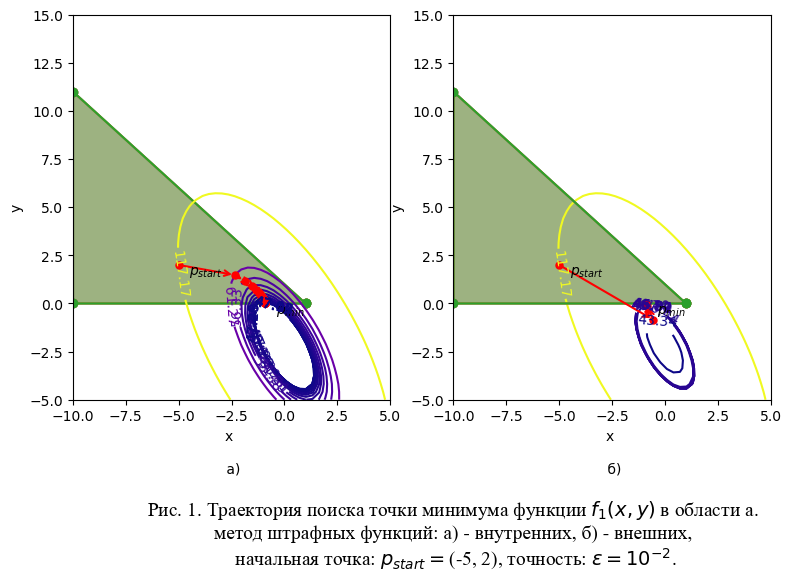

In [395]:
ExperimentPlot(func=f1_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
               n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-5, ystart=2,
                      xspacing=0.5, yspacing=0.5, fnum = 1, area = 'a', eps=2)

In [396]:
import pandas as pd
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-2, 1e-2],
                    "Начальная точка": ['(2.5, 8)', '(2.5, 8)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.2f}, {x_min1[1]: 0.2f}', f'{x_min2[0]: 0.2f}, {x_min2[1]: 0.2f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.2f}', f'{f_min2: 0.2f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.01,"(2.5, 8)",20,21,97,97,409,"-0.90, 0.00",47.02
1,внешних,0.01,"(2.5, 8)",10,11,21,21,95,"-0.89, -0.01",46.93


In [397]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f1, np.array([-5,2]), eps2, 40,g1, g2, g3)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f1, np.array([-5,2]), eps2, 0.005,22,True,g1, g2, g3)

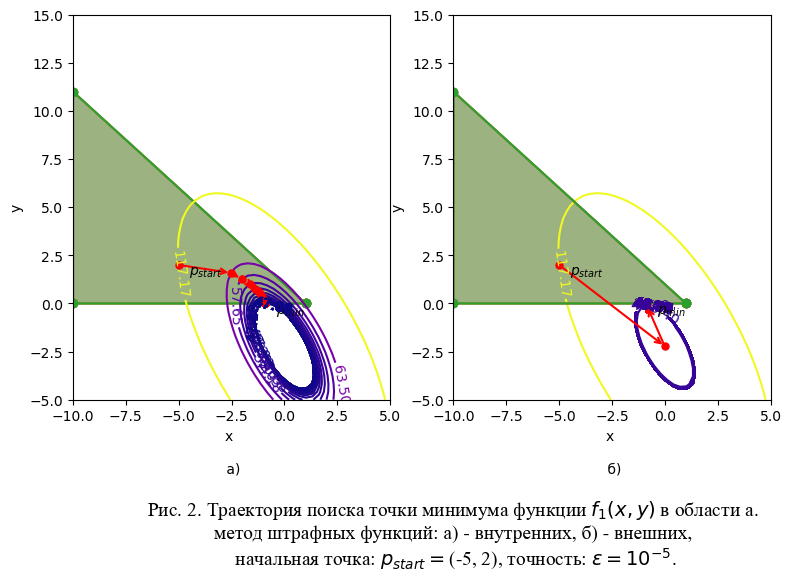

In [398]:
ExperimentPlot(func=f1_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-5, ystart=2,
                      xspacing=0.5, yspacing=0.5, fnum = 1, area = 'a', eps=5)

In [399]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-5, 1e-5],
                    "Начальная точка": ['(2.5, 8)', '(2.5, 8)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.5f}, {x_min1[1]: 0.5f}', f'{x_min2[0]: 0.5f}, {x_min2[1]: 0.5f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.5f}', f'{f_min2: 0.5f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.00001,"(2.5, 8)",40,41,243,243,1013,"-0.89443, 0.00000",47.00002
1,внешних,0.00001,"(2.5, 8)",258,259,571,571,2543,"-0.89424, -0.00047",46.99745


In [400]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f1, np.array([-7.5,5]), eps1, 40,g1, g2, g3)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f1, np.array([-7.5,5]), eps1, 0.005,22,True,g1, g2, g3)

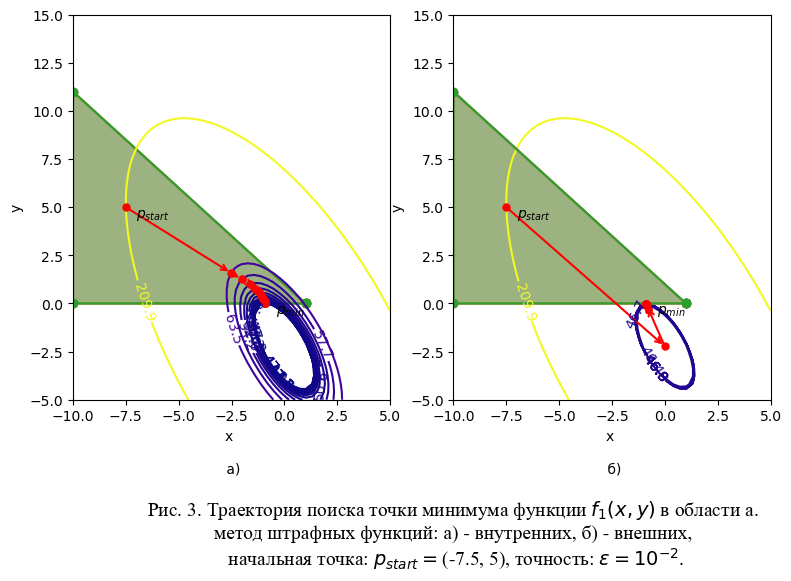

In [401]:
ExperimentPlot(func=f1_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-7.5, ystart=5,
                      xspacing=0.5, yspacing=0.5, fnum = 1, area = 'a', eps=2)

In [402]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-2, 1e-2],
                    "Начальная точка": ['(-7.5, 5)', '(-7.5, 5)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.2f}, {x_min1[1]: 0.2f}', f'{x_min2[0]: 0.2f}, {x_min2[1]: 0.2f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.2f}', f'{f_min2: 0.2f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.01,"(-7.5, 5)",20,21,98,98,413,"-0.90, 0.00",47.02
1,внешних,0.01,"(-7.5, 5)",10,11,21,21,95,"-0.89, -0.01",46.93


In [403]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f1, np.array([-7.5,5]), eps2, 1, g1, g2, g3)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f1, np.array([-7.5,5]), eps2, 10,3, True,g1, g2, g3)

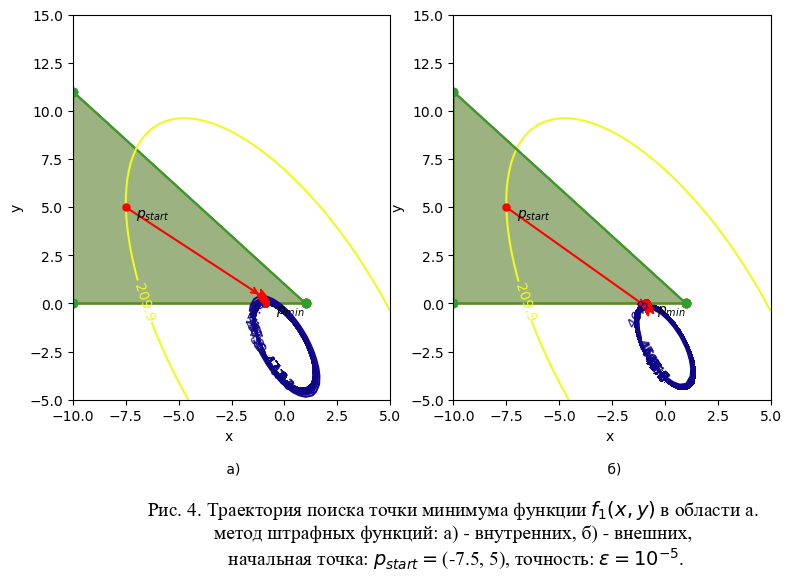

In [404]:
ExperimentPlot(func=f1_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-7.5, ystart=5,
                      xspacing=0.5, yspacing=0.5, fnum = 1, area = 'a', eps=5)

In [405]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-5, 1e-5],
                    "Начальная точка": ['(-7.5, 5)', '(-7.5, 5)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.5f}, {x_min1[1]: 0.5f}', f'{x_min2[0]: 0.5f}, {x_min2[1]: 0.5f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.5f}', f'{f_min2: 0.5f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.00001,"(-7.5, 5)",35,36,214,214,892,"-0.89443, 0.00000",47.00002
1,внешних,0.00001,"(-7.5, 5)",691,692,1521,1521,6776,"-0.89391, -0.00129",46.99308


In [406]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f21, np.array([-5,2]), eps1, 2,g1, g2, g3)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f21, np.array([-5,2]), eps1, 32,2,True,g1, g2, g3)

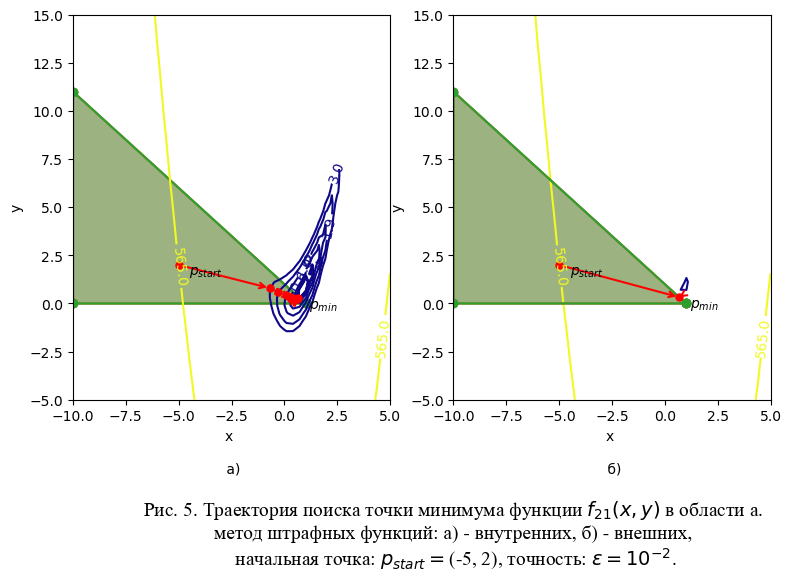

In [407]:
ExperimentPlot(func=f21_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-5, ystart=2,
                      xspacing=0.5, yspacing=0.5, fnum = 21, area = 'a', eps=2)

In [408]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-2, 1e-2],
                    "Начальная точка": ['(2.5, 8)', '(2.5, 8)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.2f}, {x_min1[1]: 0.2f}', f'{x_min2[0]: 0.2f}, {x_min2[1]: 0.2f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.2f}', f'{f_min2: 0.2f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.01,"(2.5, 8)",11,12,48,48,204,"0.65, 0.27",0.15
1,внешних,0.01,"(2.5, 8)",2,3,12,12,51,"0.68, 0.32",0.12


In [409]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f21, np.array([-5,2]), eps2, 2,g1, g2, g3)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f21, np.array([-5,2]), eps2, 32,2,True,g1, g2, g3)

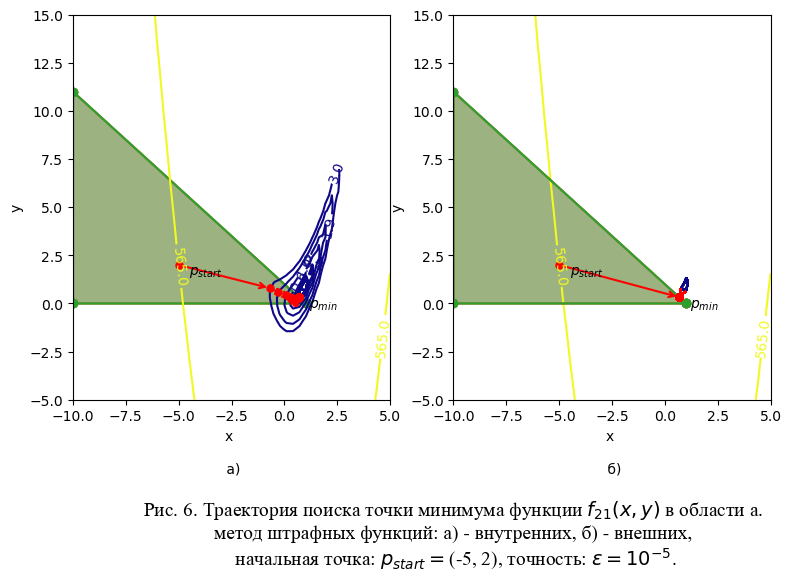

In [410]:
ExperimentPlot(func=f21_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-5, ystart=2,
                      xspacing=0.5, yspacing=0.5, fnum = 21, area = 'a', eps=5)

In [411]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-5, 1e-5],
                    "Начальная точка": ['(2.5, 8)', '(2.5, 8)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.5f}, {x_min1[1]: 0.5f}', f'{x_min2[0]: 0.5f}, {x_min2[1]: 0.5f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.5f}', f'{f_min2: 0.5f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.00001,"(2.5, 8)",31,32,196,196,816,"0.67762, 0.32230",0.12266
1,внешних,0.00001,"(2.5, 8)",29,30,67,67,298,"0.67819, 0.32337",0.12222


In [412]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f21, np.array([-7.5,5]), eps1, 2,g1, g2, g3)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f21, np.array([-7.5,5]), eps1, 32,2,True,g1, g2, g3)

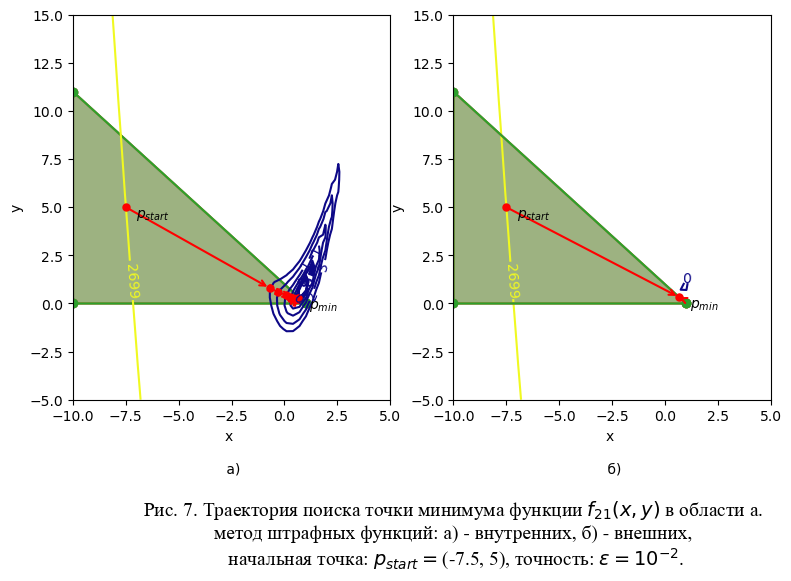

In [413]:
ExperimentPlot(func=f21_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-7.5, ystart=5,
                      xspacing=0.5, yspacing=0.5, fnum = 21, area = 'a', eps=2)

In [414]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-2, 1e-2],
                    "Начальная точка": ['(-7.5, 5)', '(-7.5, 5)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.2f}, {x_min1[1]: 0.2f}', f'{x_min2[0]: 0.2f}, {x_min2[1]: 0.2f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.2f}', f'{f_min2: 0.2f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.01,"(-7.5, 5)",11,12,49,49,208,"0.65, 0.27",0.15
1,внешних,0.01,"(-7.5, 5)",2,3,14,14,59,"0.68, 0.32",0.12


In [415]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f21, np.array([-7.5,5]), eps2, 32,g1, g2, g3)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f21, np.array([-7.5,5]), eps2, 0.004,10,True,g1, g2, g3)

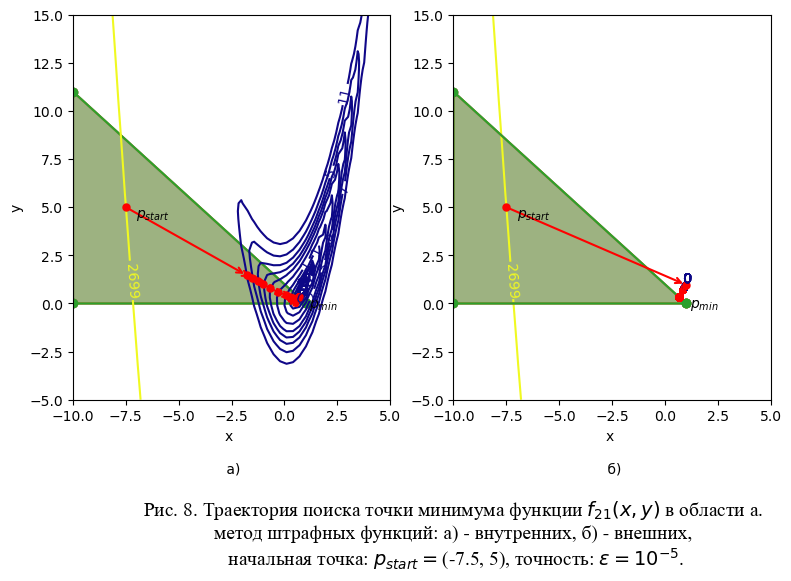

In [416]:
ExperimentPlot(func=f21_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-7.5, ystart=5,
                      xspacing=0.5, yspacing=0.5, fnum = 21, area = 'a', eps=5)

In [417]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-5, 1e-5],
                    "Начальная точка": ['(-7.5, 5)', '(-7.5, 5)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.5f}, {x_min1[1]: 0.5f}', f'{x_min2[0]: 0.5f}, {x_min2[1]: 0.5f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.5f}', f'{f_min2: 0.5f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.00001,"(-7.5, 5)",35,36,201,201,840,"0.67762, 0.32230",0.12266
1,внешних,0.00001,"(-7.5, 5)",21,22,69,69,298,"0.67789, 0.32280",0.12245


In [418]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f22, np.array([-7.5,5]), eps1, 2,g1, g2, g3)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f22, np.array([-7.5,5]), eps1, 32,2,True,g1, g2, g3)

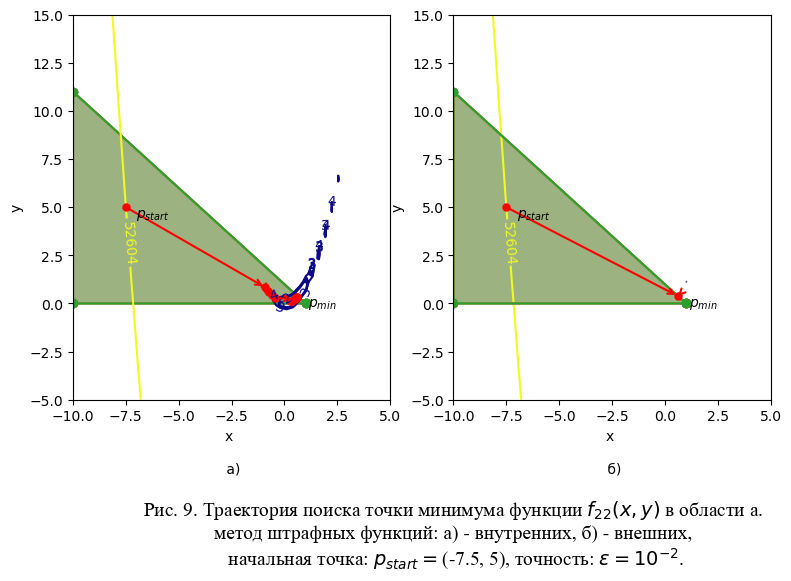

In [419]:
ExperimentPlot(func=f22_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-7.5, ystart=5,
                      xspacing=0.5, yspacing=0.5, fnum = 22, area = 'a', eps=2)

In [420]:
df1 = pd.DataFrame({"Метод":['внутренних','внешних' ],
                    "Точность": [1e-2, 1e-2],
                    "Начальная точка": ['(-7.5, 5)', '(-7.5, 5)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.2f}, {x_min1[1]: 0.2f}', f'{x_min2[0]: 0.2f}, {x_min2[1]: 0.2f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.2f}', f'{f_min2: 0.2f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.01,"(-7.5, 5)",12,13,73,73,305,"0.60, 0.35",0.16
1,внешних,0.01,"(-7.5, 5)",2,3,20,20,83,"0.62, 0.38",0.14


# МНОЖЕСТВО b

In [421]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f1, np.array([-2.5,-5]), eps1, 32, g4)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f1, np.array([-2.5,-5]), eps1, 2,22,True, g4)

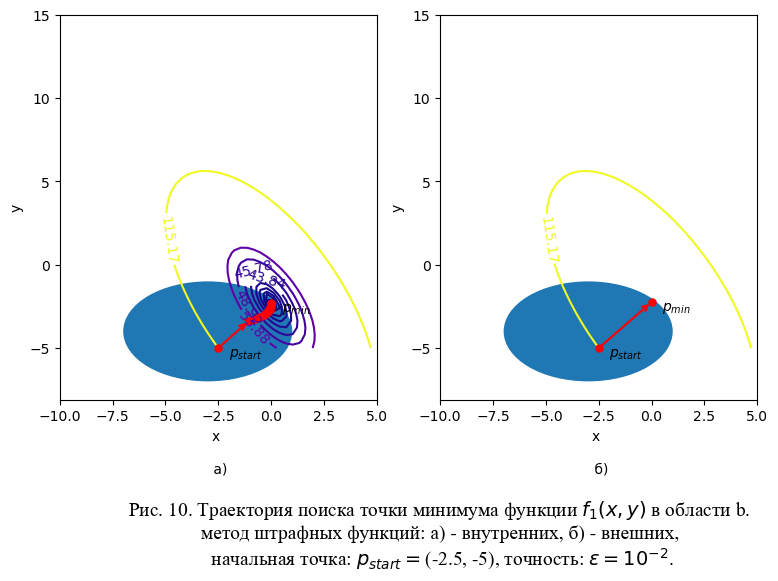

In [422]:
ExperimentPlot(func=f1_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-2.5, ystart=-5,
                      xspacing=0.5, yspacing=0.5, fnum = 1, area = 'b', eps=2)

In [423]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-2, 1e-2],
                    "Начальная точка": ['(2.5, 8)', '(2.5, 8)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.2f}, {x_min1[1]: 0.2f}', f'{x_min2[0]: 0.2f}, {x_min2[1]: 0.2f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.2f}', f'{f_min2: 0.2f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.01,"(2.5, 8)",13,14,47,47,202,"0.00, -2.29",41.01
1,внешних,0.01,"(2.5, 8)",2,3,3,3,15,"0.00, -2.24",41.00


In [424]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f1, np.array([-2.5,-5]), eps2, 0.004,g4)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f1, np.array([-2.5,-5]), eps2, 0.005,22,True,g4)

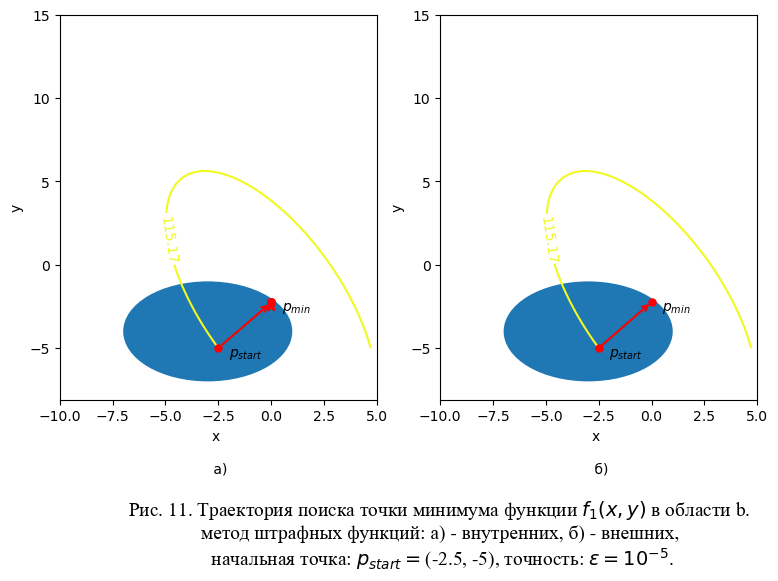

In [425]:
ExperimentPlot(func=f1_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-2.5, ystart=-5,
                      xspacing=0.5, yspacing=0.5, fnum = 1, area = 'b', eps=5)

In [426]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-5, 1e-5],
                    "Начальная точка": ['(2.5, 8)', '(2.5, 8)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.5f}, {x_min1[1]: 0.5f}', f'{x_min2[0]: 0.5f}, {x_min2[1]: 0.5f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.5f}', f'{f_min2: 0.5f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.00001,"(2.5, 8)",7,8,30,30,128,"0.00002, -2.23681",41.00000
1,внешних,0.00001,"(2.5, 8)",2,3,7,7,31,"-0.00000, -2.23607",41.00000


In [427]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f1, np.array([-5,-5]), eps1, 40,g4)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f1, np.array([-5,-5]), eps1, 0.005,22,True,g4)

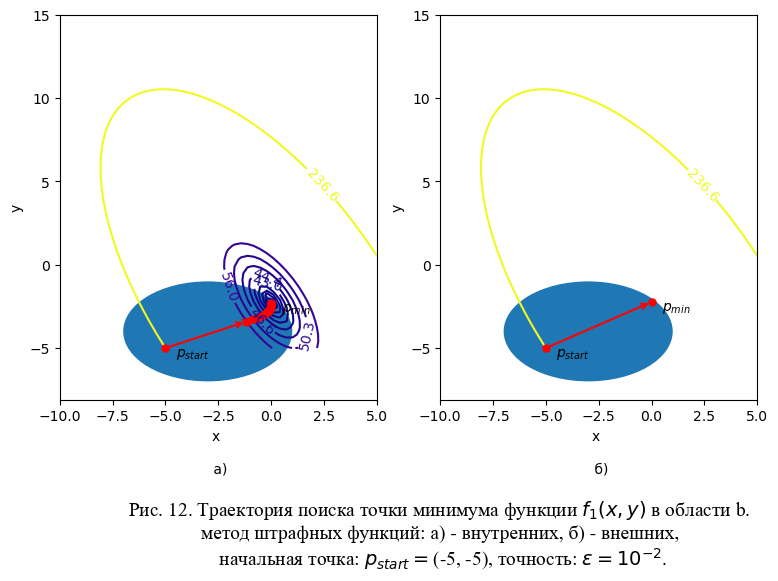

In [428]:
ExperimentPlot(func=f1_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-5, ystart=-5,
                      xspacing=0.5, yspacing=0.5, fnum = 1, area = 'b', eps=2)

In [429]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-2, 1e-2],
                    "Начальная точка": ['(-7.5, 5)', '(-7.5, 5)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.2f}, {x_min1[1]: 0.2f}', f'{x_min2[0]: 0.2f}, {x_min2[1]: 0.2f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.2f}', f'{f_min2: 0.2f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.01,"(-7.5, 5)",14,15,50,50,215,"0.00, -2.28",41.00
1,внешних,0.01,"(-7.5, 5)",2,3,3,3,15,"0.00, -2.24",41.00


In [430]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f1, np.array([-5,-5]), eps2, 1,g4)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f1, np.array([-5,-5]), eps2, 10,3, True,g4)

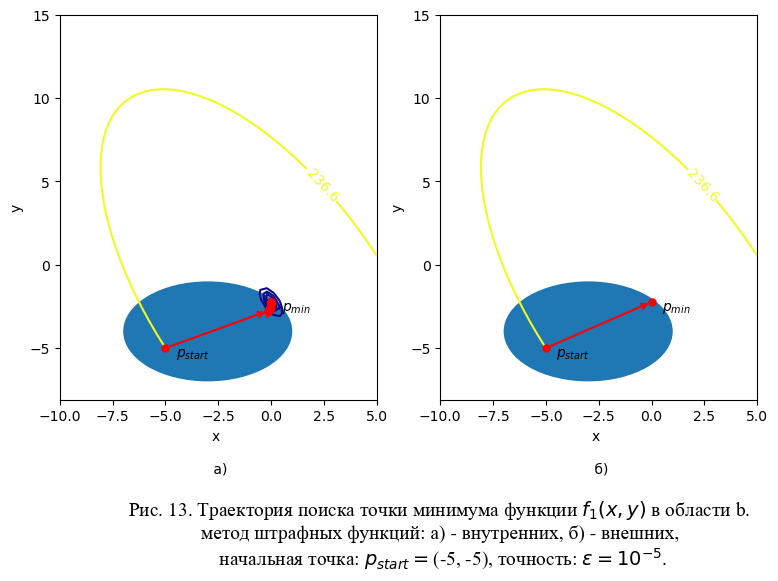

In [431]:
ExperimentPlot(func=f1_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-5, ystart=-5,
                      xspacing=0.5, yspacing=0.5, fnum = 1, area = 'b', eps=5)

In [432]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-5, 1e-5],
                    "Начальная точка": ['(-7.5, 5)', '(-7.5, 5)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.5f}, {x_min1[1]: 0.5f}', f'{x_min2[0]: 0.5f}, {x_min2[1]: 0.5f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.5f}', f'{f_min2: 0.5f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.00001,"(-7.5, 5)",15,16,74,74,312,"0.00002, -2.23679",41.00000
1,внешних,0.00001,"(-7.5, 5)",2,3,9,9,39,"-0.00000, -2.23607",41.00000


In [433]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f21, np.array([-2.5,-5]), eps1, 32,g4)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f21, np.array([-2.5,-5]), eps1, 32,2,True,g4)

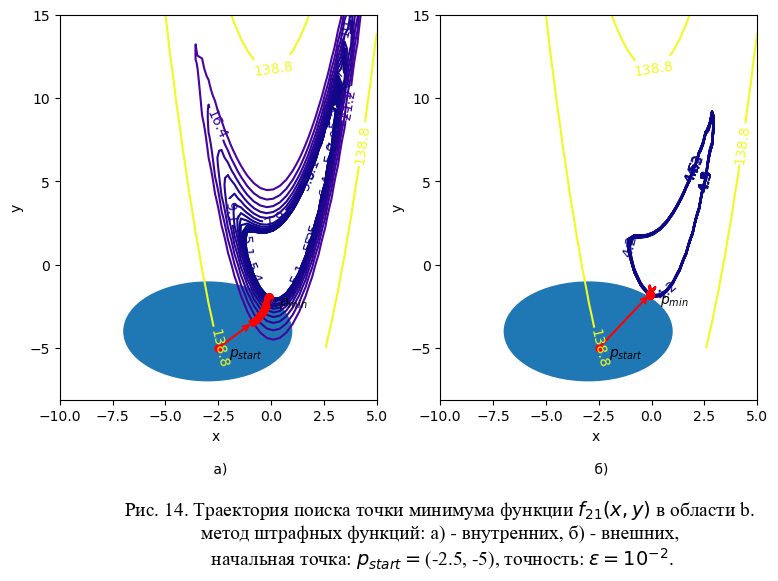

In [434]:
ExperimentPlot(func=f21_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-2.5, ystart=-5,
                      xspacing=0.5, yspacing=0.5, fnum = 21, area = 'b', eps=2)

In [435]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-2, 1e-2],
                    "Начальная точка": ['(2.5, 8)', '(2.5, 8)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.2f}, {x_min1[1]: 0.2f}', f'{x_min2[0]: 0.2f}, {x_min2[1]: 0.2f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.2f}', f'{f_min2: 0.2f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.01,"(2.5, 8)",20,21,96,96,405,"-0.11, -1.93",5.01
1,внешних,0.01,"(2.5, 8)",23,24,53,53,236,"-0.09, -1.84",4.58


In [436]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f21, np.array([-2.5,-5]), eps2, 52,g4)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f21, np.array([-2.5,-5]), eps2, 32,2,False,g4)

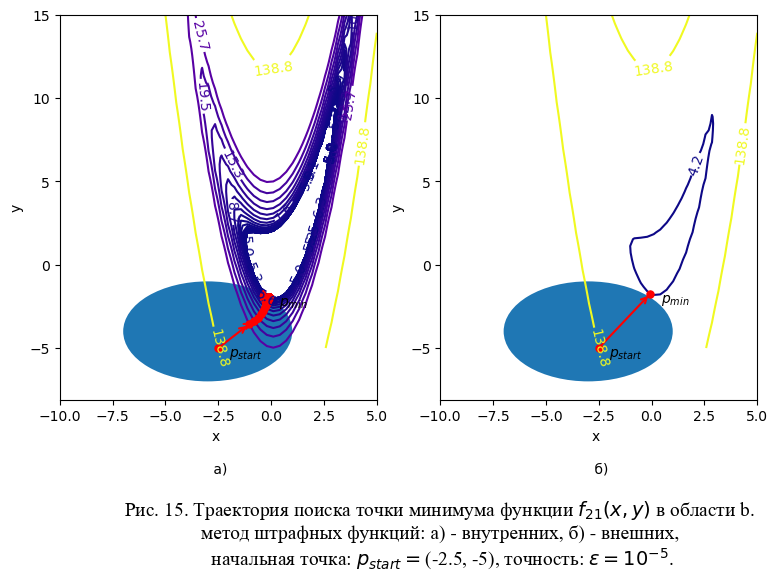

In [437]:
ExperimentPlot(func=f21_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-2.5, ystart=-5,
                      xspacing=0.5, yspacing=0.5, fnum = 21, area = 'b', eps=5)

In [438]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-5, 1e-5],
                    "Начальная точка": ['(2.5, 8)', '(2.5, 8)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.5f}, {x_min1[1]: 0.5f}', f'{x_min2[0]: 0.5f}, {x_min2[1]: 0.5f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.5f}', f'{f_min2: 0.5f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.00001,"(2.5, 8)",41,42,246,246,1026,"-0.10720, -1.92809",4.98787
1,внешних,0.00001,"(2.5, 8)",2,3,13,13,55,"-0.06093, -1.73819",4.15982


In [439]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f21, np.array([-2.5,-5]), eps1, 2,g4)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f21, np.array([-2.5,-5]), eps1, 32,2,True,g4)

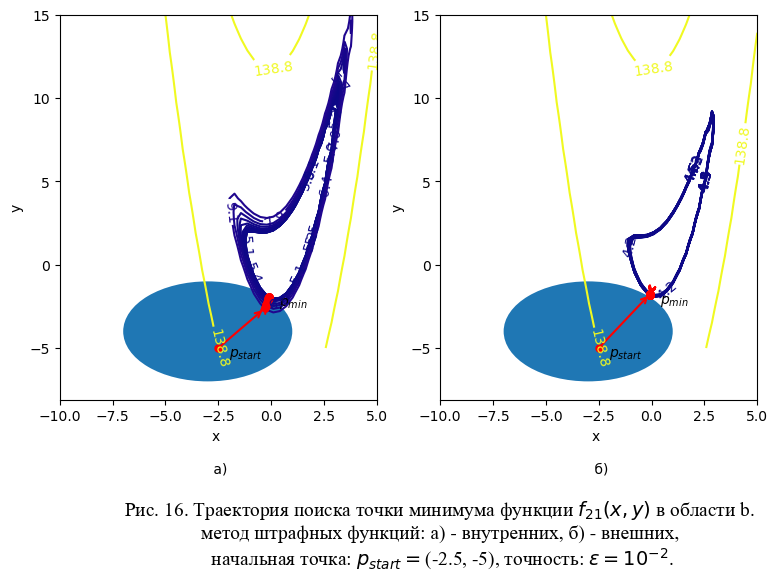

In [440]:
ExperimentPlot(func=f21_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-2.5, ystart=-5,
                      xspacing=0.5, yspacing=0.5, fnum = 21, area = 'b', eps=2)

In [441]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-2, 1e-2],
                    "Начальная точка": ['(-7.5, 5)', '(-7.5, 5)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.2f}, {x_min1[1]: 0.2f}', f'{x_min2[0]: 0.2f}, {x_min2[1]: 0.2f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.2f}', f'{f_min2: 0.2f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.01,"(-7.5, 5)",16,17,99,99,413,"-0.11, -1.93",5.01
1,внешних,0.01,"(-7.5, 5)",23,24,53,53,236,"-0.09, -1.84",4.58


In [442]:
ind += 1
x_min1, f_min1, its1, fcalls1, grcalls1, hscalls1, xvals1, yvals1 = InfoIPFMinSearch(f21, np.array([-5,-5]), eps2, 32,g4)
x_min2, f_min2, its2, fcalls2, grcalls2, hscalls2, xvals2, yvals2 = InfoOPFMinSearch(f21, np.array([-5,-5]), eps2, 33,2,False,g4)
print(its2)

2


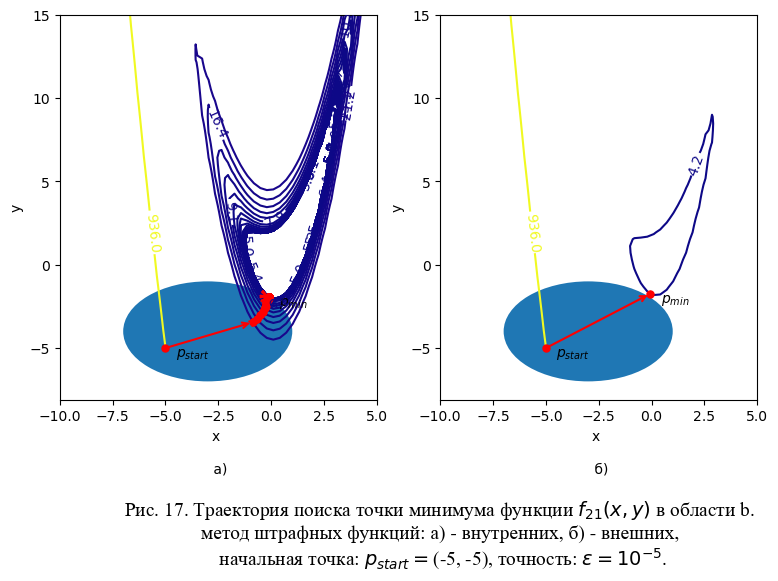

In [443]:
ExperimentPlot(func=f21_pl, xmin = -10, xmax=5, ymin=-5, ymax=15, 
                    n1=its1, n2=its2, xs1=xvals1, ys1=yvals1, xs2=xvals2, ys2=yvals2, 
               ind=ind, xstart=-5, ystart=-5,
                      xspacing=0.5, yspacing=0.5, fnum = 21, area = 'b', eps=5)

In [444]:
df1 = pd.DataFrame({"Метод": ['внутренних','внешних' ],
                    "Точность": [1e-5, 1e-5],
                    "Начальная точка": ['(-7.5, 5)', '(-7.5, 5)'],
                    "Кол-во итераций": [its1, its2], 
                    "Кол-во вычисленных значений целевой функции": [fcalls1, fcalls2],
                    "Кол-во вычисленных градиентов": [grcalls1, grcalls2],
                    
                    "Кол-во вычисленных матриц Гессе": [hscalls1, hscalls2],
                    "Стоимость": [fcalls1+grcalls1*2+hscalls1*2,fcalls2+grcalls2*2+hscalls2*2],
                    "Точка минимума": [f'{x_min1[0]: 0.5f}, {x_min1[1]: 0.5f}', f'{x_min2[0]: 0.5f}, {x_min2[1]: 0.5f}'],
                    "Минимальное значение функции": [f'{f_min1: 0.5f}', f'{f_min2: 0.5f}']
                   })
df1

,Метод,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Стоимость,Точка минимума,Минимальное значение функции
0,внутренних,0.00001,"(-7.5, 5)",40,41,241,241,1005,"-0.10721, -1.92808",4.98787
1,внешних,0.00001,"(-7.5, 5)",2,3,12,12,51,"-0.06207, -1.74288",4.17908


# Выводы


0) В качестве внутреннего метода оптимизации выбран метод Ньютона, так как он не использует затратную одномерную минимизацию и не зависит от её точности. Также для квадратичной функции метод Ньютона сходится за одну итерацию.

1) При выборе начальной точки, находящейся в допустимом множестве, алгоритм метода внутренних штрафных функций сходится за меньшее число итераций и вычислений целевой функции, чем алгоритм внешних штрафных функций, и наоборот. При этом метод внутренних штрафных функций сходится изнутри области, а внешних — снаружи. 

2) Оба алгоритма очень чувствительны к выбору параметра $r_0$ и шага в поледовательности {$r_k$}.

3)	Первая итерация методов делает большой шаг в сторону точки минимума, а следующие уточняют её положение с изменением штрафной функции.

4) При переходе к выраженной овражной функции сильно возрастают вычислительные затраты, возникает потеря точности